### OpenCV(Open Source Computer Vision) 개요
- Computer Vision : 사람의 시각적인 부분을 기계로 구현하는 것을 목적으로하는 딥러닝 분야
- OpenCV : 이미지, 동영상 등의 처리를 지원하는 라이브러리 
- C++로 제작되어 있고, Java, JS, Android, Python 등 다양한 언어에서 활용가능
- 특히 파이썬에서 사용할 경우 Numpy,Matplotlib 등의 라이브러리와 바로 연동 가능

- https//opencv.org/ : OpenCV 공식 사이트
- https://github.com/opencv/opencv : OpenCV github 사이트 

In [1]:
# OpenCV 설치
!pip install opencv-python

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

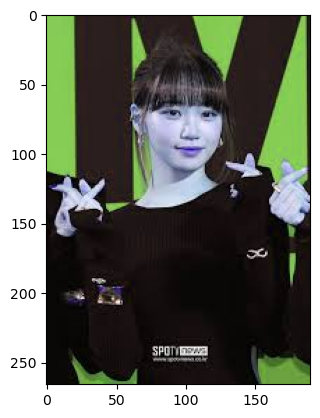

In [3]:
cat = cv2.imread('image/images.jpg')
plt.imshow(cat);

### OpenCV의 색상 체계
- 일반적인 이미지를 matplotlib으로 출력시 RGB 색상 체계를 사용
- OpenCV는 BGR 색상 체계를 사용
- 그래서 RGB이미지를 cv2로 불러와서 matplolib

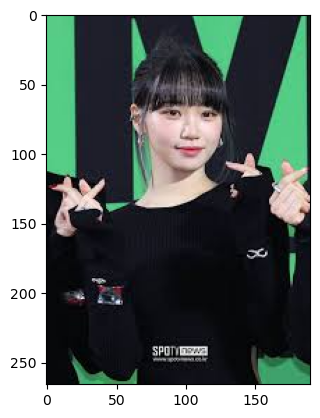

In [4]:
cat = cv2.imread('image/images.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

plt.imshow(cat)

In [5]:
# R과 B 자리만 바뀜
cat

array([[[ 88, 203, 134],
        [ 88, 203, 134],
        [ 88, 203, 134],
        ...,
        [  0,  31,   9],
        [ 13,  34,  27],
        [ 27,  35,  37]],

       [[ 88, 203, 134],
        [ 88, 203, 134],
        [ 88, 203, 134],
        ...,
        [  0,  31,   9],
        [ 13,  34,  27],
        [ 27,  35,  37]],

       [[ 88, 203, 134],
        [ 88, 203, 134],
        [ 88, 203, 134],
        ...,
        [  0,  30,   9],
        [ 13,  34,  27],
        [ 27,  35,  37]],

       ...,

       [[  7,   8,  10],
        [  7,   8,  10],
        [  7,   8,  10],
        ...,
        [ 52, 155, 100],
        [ 55, 158, 103],
        [ 61, 164, 109]],

       [[  7,   8,  10],
        [  7,   8,  10],
        [  7,   8,  10],
        ...,
        [ 58, 163, 107],
        [ 57, 162, 106],
        [ 57, 162, 106]],

       [[  7,   8,  10],
        [  7,   8,  10],
        [  7,   8,  10],
        ...,
        [ 58, 163, 107],
        [ 55, 162, 106],
        [ 55, 162, 106]]

In [6]:
print(cat.shape) # 세로픽셀수, 가로픽셀수, 채널수(컬러는 3)
print(cat.size)  # 전체 데이터 값 개수
print(cat.dtype) # 데이터 타입
# uint8 : unsigned interger(부호가 없는 정수)

(266, 190, 3)
151620
uint8


### 이미지 색상 종류
- 컬러 이미지(RGB) 
- 흑백 이미지(Gray) -> 0 ~ 255사이의 흑백 픽셀값으로 구성된 이미지 
  - 컬러 이미지는 용량이 크고 연산량이 많기 때문에 이를 간소화 시켜 처리하기 위해서 흑백이미지를 사용함
- 이진 이미지(binary) -> 0과 255 두 가지 값으로만 구성된 이미지 
  -  배경과 객체를 잘 구분
  - 관심 영역과 비관심 영역을 구분
  - 필터를 만들거나 단순한 이미지 처리를 하는 경우에 사용

- 1. 기존 컬러 이미지를 Gray로 불러서 받아주고 출력하기

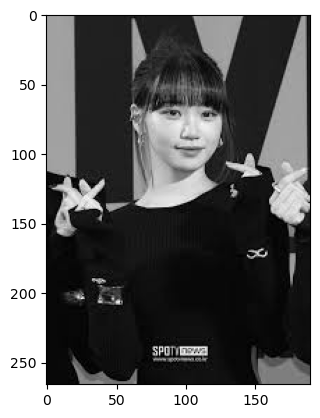

In [7]:
# 이미지를 불러올 때 그레이로 받아주고, 출력할 때도 gray로 설정해줘야함
cat_gray = cv2.imread('image/images.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(cat_gray, cmap = 'gray')

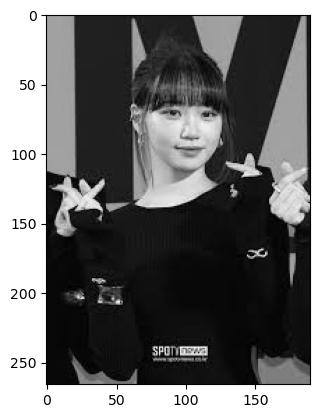

In [8]:
cat2 = cv2.imread('image/images.jpg')
cat2_gray = cv2.cvtColor(cat2, cv2.COLOR_BGR2GRAY)

plt.imshow(cat2_gray, cmap ='gray');

#### 이진(binanry) 이미지 만들기
- 기존 이미지 컬러 이미지라면 gray이미지로 변환 후 이진으로 바꿔줘야 함 

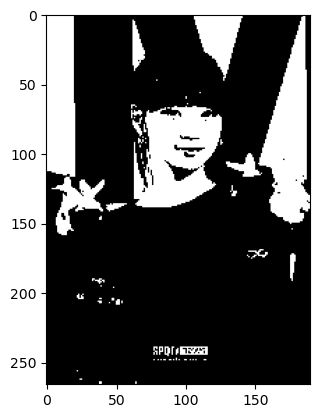

In [9]:
# threshold(문턱값, 경계값) : 특정 기준값을 통해서 데이터를 변환시켜주는 함수
# (이미지, 경계기준값, 경계값보다 클때 적용되는 값, 경계값 적용방식)
_, bi_cat = cv2.threshold(cat2_gray, 140, 255, cv2.THRESH_BINARY)

# _ : 첫번째 리턴 값은 받지 않음(threshold함수는 두 가지 값이 리턴됨)
# 리턴 값의 첫 번째는 경계값 수치, 두번째는 경계값 기준이 적용된 이미지

plt.imshow(bi_cat, cmap='gray');

In [10]:
temp, bi_cat = cv2.threshold(cat2_gray, 140, 255, cv2.THRESH_BINARY)
temp

140.0

In [11]:
bi_cat

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

### cv2.threshold(img, threshold_value,flag)
- img : gray 이미지 
- threshold_value : 경계 기준값
- value : 경계값 보다 클 때 적용되는 값
- flag : 경계값 적용 방식  
  - cv2.THRESH_BINARY : 픽셀값이 경계값보다 크면 value, 아니면 0을 할당(흰색 or 검은색으로만 표시)
  - cv2.THRESH_BINARY_INV : 픽셀값이 경계값보다 크면 0, 아니면 value 할당 
  - cv2.THRESH_TRUNC : 픽셀값이 경계값보다 크면 경계값, 아니면 픽셀값 할당(가장 흰 부분이 경계값으로 표시)
  - cv2.THRESH_TOZERO : 픽셀값이 경계값보다 크면 픽셀값, 아니면 0을 할당(검은색부각)
  - cv2.THRESH_TOZERO_INV : 필셀값이 경계값보다 크면 0, 아니면 픽셀값 할당 
  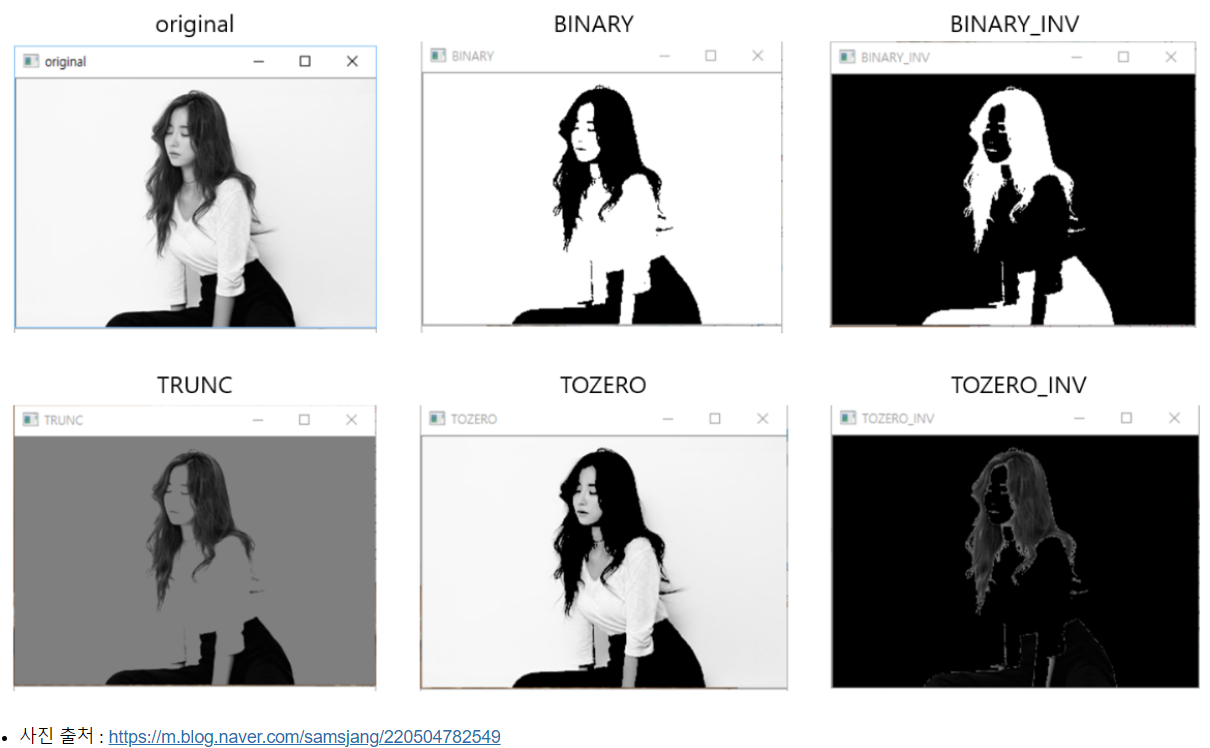

### 동영상 혹은 카메라(웹 캠) 불러오기

비디오 캡처 성공^-^
읽기 성공 여부: True
프레임 shape (358, 640, 3)
[[[ 89 151 176]
  [ 89 151 176]
  [ 88 150 175]
  ...
  [ 21 129 177]
  [ 21 129 177]
  [  4 112 160]]

 [[118 180 205]
  [118 180 205]
  [118 180 205]
  ...
  [ 35 143 191]
  [ 35 143 191]
  [ 18 126 174]]

 [[125 187 212]
  [125 187 212]
  [125 187 212]
  ...
  [ 47 155 203]
  [ 47 155 203]
  [ 29 137 185]]

 ...

 [[ 41  68  71]
  [ 41  68  71]
  [ 41  68  71]
  ...
  [ 10  40  49]
  [ 10  40  49]
  [ 10  40  49]]

 [[ 18  45  48]
  [ 18  45  48]
  [ 18  45  48]
  ...
  [ 15  29  41]
  [ 15  29  41]
  [ 15  29  41]]

 [[  0  27  30]
  [  0  27  30]
  [  0  27  30]
  ...
  [  0  14  26]
  [  0  14  26]
  [  0  14  26]]]


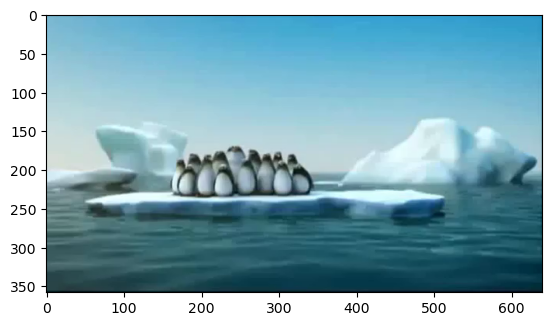

In [12]:
# 영상에 있는 프레임 출력해보기 
''' 영상을 다룰 때는 연속된 프레임을 실시간으로 처리해주기 떄문에 제대로 
    동작하지 않았을 겨우에 대한 예외처리를 해주는 것이 오류로 인한 중단을 
    방지하거나 오류의 위치를 파아가함에 있어서 유리함

'''
# 1, 영상에서 프레임을 캡처
# 코드 실행에 문제가 없을 경우
try :
    # 1) 카메라(웹캠)으로부터 캡처(일반적으로 내장 카메라는 0번으로 인식)
#cap  = cv2.VideoCapture(0)
    # 2) 동영상으로 부터 캡처
    cap  = cv2.VideoCapture("image/영상.mp4")
    print("비디오 캡처 성공^-^")
# 코드 실행에 문제가 생길 경우
except : 
    print("비디오 캡쳐 실패 ㅠㅠ")
    
# 2, 캡처해온 프레임을 읽고 출력시키기 
# read : 캡쳐란 이미지 프레임을 한 장씩 읽어옴 
# ret : 읽기 성공여부(True, False)
# frame : 실제 이미지의 배열 데이터 
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

print("읽기 성공 여부:", ret)
print("프레임 shape", frame.shape)
print(frame)
plt.imshow(frame);


## 동영상 읽어와서 동영상으로 출력하기


In [13]:
try :
    # 영상에서 프레임단위로 사진을 캡쳐해서 받아오기
    cap = cv2.VideoCapture(0)
    print("비디오 캡쳐 시작~!")
except :
    print("비디오 캡쳐 실패ㅠㅠ")
    
# 캡쳐해온 프레임을 계속해서 한 장씩 읽어와 연결하여 출력(영상으로 보여주기)
while True :
    ret, frame = cap.read()
    '''폭력감지 영상 판단을 예로 들면 CCTV영상에서 frame 단위로 이미지를
       읽어온 후, 폭력 이미지인지 아닌지를 판단하는 딥러닝 모델에 넣어서
       model.predict(frame)로 영상의 각 프레임들이 폭력인지 아닌지를 판단
       해 내도록 할 수 있음.
       단 모델이 무겁다면 예측하는데 시간이 많이 소요되기 때문에 실시간
       판단이 힘들어지거나 출력되는 영상의 초당 프레임수(FPS)가 떨어지는
       현상이 발생할 수 있음
    '''
    # 영상 반전(1:좌우반전, 0:상하반전)
    frame = cv2.flip(frame, 1)
    # frame = cv2.resize(frame, (500,300))
    # 흑백 영상 설정
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 영상으로 부터 프레임을 받아오지 못했거나 다 읽었을 경우 메모리 할당 끊기
    if ret == False :
        print("프레임 읽기 실패 or 프레임 모두 읽음!")
        cap.release()
        cv2.destroyAllWindows()
        break
        
    # imshow : 새 윈도우 창을 띄워서 이미지 혹은 영상 출력(윈도우 창 이름, 프레임)
    cv2.imshow("video^^", frame)
    
    # waitKey : 키보드의 특정 값을 입력받을 때까지 기다리며 지정된 시간만큼 대기하는 함수
    # 한장의 프레임을 일고 40ms 후 다음 프레임 읽어들임(우리 영상은 초당 25프레임)
    key = cv2.waitKey(40)
    '''
       - 일반적으로 동영상을 초당 30장 이상의 프레임으로 출력하면 부드러운 영상
       - waitKey 괄호 안의 시간 단위는 ms이므로 실제 1초는 숫자 1000이 됨
       - 영상의 실제 프레임수와 waitKey값이 차이가 나면 플레이 자체는 문제가 없지만
         뒤쪽 프레임 일부가 잘려서 실행될 수도 있음
       - 영상의 초당 프레임수가 다르면 거기에 맞춰 딜레이 시간을 설정해줘야 함
         ex) 영상이 초당 60프레임이라면 16 or 17ms 로 설정하기!
    '''
    
    # 재생 도중 영상을 끄고 싶을 경우(윈도우창 X를 누르면 커널을 재시작해야함!!)
    # 아스키코드 : 미국표준협회에서 제시한 표준 코드 체계
    # (키보드의 키값들을 코드에서 숫자로 표현 가능)
    # 27 : ESC키
    # 49 : 키보드 숫자 1
    if key == 27 :
        print("동영상 읽기 종료")
        cap.release()
        cv2.destroyAllWindows()
        break

비디오 캡쳐 시작~!
동영상 읽기 종료


### 동영상 캡쳐 및 녹화하고 저장하기 

In [14]:
try :
    cap = cv2.VideoCapture(0)
    print("비디오 캡쳐 시작~!")
except :
    print("비디오 캡쳐 실패ㅠㅠ")
    
fps = 25.0             # 초당 프레임 이미지 수
w = int(cap.get(3))    # 캡처한 비디오 프레임의 가로 크기
h = int(cap.get(4))    # 캡처한 비디오 프레임의 세로 크기
# 영상 코덱 설정(CODEC : COder and DECoder)
# coder : 음성 또는 영상의 신호를 디지털 신호로 변환(decoder는 coder의 반대)
codec = cv2.VideoWriter_fourcc(*'DIVX')   # 가장 일반적인 영상 코덱

# 저장될 녹화 영상 파일 설정(파일명, 코덱, 속도, 크기)
out = cv2.VideoWriter('image/record_file.avi', codec, fps, (w,h))

# 녹화 상태 여부
record = False
cnt = 1

while True :
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    
    if ret == False :
        print("비디오 읽기 실패 or 모두 읽음!")
        cap.release()
        # 출력해 줄 녹화 영상의 이미지들을 담아두는 out 변수의 메모리 할당도 끊기
        out.release()
        cv2.destroyAllWindows()
        break
    
    cv2.imshow("record^^", frame)
    
    # record가 True 설정되면 영상 녹화를 시작
    if record == True :
        # write : 프레임 데이터 읽고 쓰기(읽어온 프레임으로 출력 영상 만들기)
        out.write(frame)
        
    key = cv2.waitKey(40)
    
    # 키보드 숫자 1번을 눌렀을 경우(이미지 캡쳐)
    if key == 49 :   
        print(f"이미지를 캡쳐합니다_{cnt}번째!")
        record = True
        # imwrite : 프레임 저장 함수
        cv2.imwrite(f"image/captured_img_{cnt}.jpg", frame)
        cnt += 1
        
    # 키보드 숫자 2번을 눌렀을 경우(영상 녹화)
    if key == 50 :
        print("녹화를 시작합니다.")
        record=True
        
    # 키보드 ESC키 눌렀을 경우(영상 끄기)
    if key == 27 :
        print("녹화를 종료하고 창을 닫습니다.")
        cap.release()
        out.release()
        cv2.destroyAllWindows()
        break

비디오 캡쳐 시작~!
녹화를 종료하고 창을 닫습니다.


### 이미지 픽셀값 변경하기

[28 28 38]


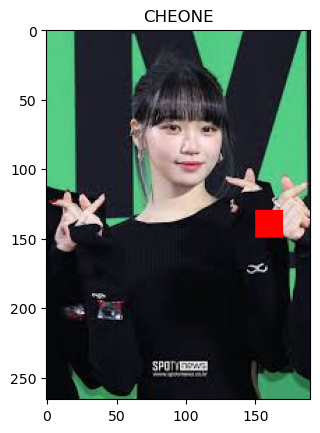

In [43]:
cat = cv2.imread('image/images.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

print(cat[50, 150])# [세로 픽셀, 가로 픽셀]

cat[130:150, 150:170] = [255,0,0]

plt.title('CHEONE')

plt.imshow(cat);

### ROI(Region of Interest) 관심영역 추출하기 

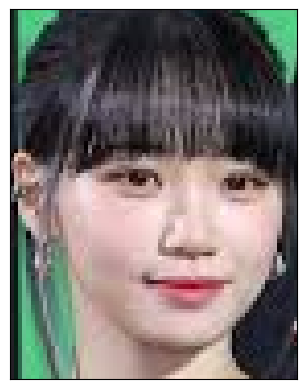

In [58]:
roi_cat = cat[30:120, 60:130]

plt.xticks([])
plt.yticks([])
plt.imshow(roi_cat)

### ROI 영역을 그림으로 표시하고 문자도 출력해보자!
- line : 선을 그리는 함수
- rectangle : 사각형을 그리는 함수
- circle : 원을 그리는 함수
- putText : 텍스느 그리는 함수

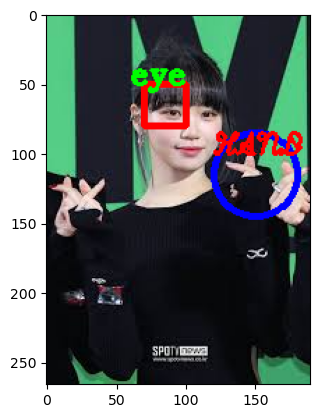

In [87]:
cat = cv2.imread('image/images.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

# 배열 접근과는 달리 가로, 세로 순서로 좌표를 설정
# line : 선 출력(이미지, 시작좌표, 끝좌표, 색상, 선두께)
#cat = cv2.line(cat, (100,120), (50,20), (0,255,0), 5)
# rectangle :사각형 박스 출력(이미지, 좌상단좌표,, 우하단좌표, 색상, 선두께)
cat = cv2.rectangle(cat, (70,50), (100,80),(255,0,0), 3)

# circle : 원 출력(이미지, 원중심좌표, 반지름, 색상, 선두깨)
cat = cv2.circle(cat, (150,115), (30),(0,0,255), 3)

# putText : 텍스트 출력(이미지, 출력글씨, 출력좌표,폰트, 폰트크기, 색상, 선두께)
cat = cv2.putText(cat, "eye",(60,50), cv2.FONT_HERSHEY_TRIPLEX, 0.7, (0,255,0), 2)
cat = cv2.putText(cat, "HAND",(120,100), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.7, (255,0,0), 2)

plt.imshow(cat);

In [ ]:
from PIL import ImageFont, ImageDraw, Image

In [25]:
cat = cv2.imread('image/image_cat.png')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

#폰트 및 폰트 크기 설정
test_font = ImageFont.truetype('fonts/gulim.ttc', 30)

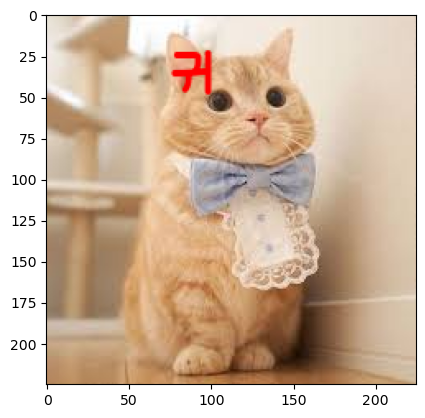

In [26]:
# 이미지위에 글씨 출력할 공간생성
# 폰트 설정하여 한글을 그 위에 표시
#PIL 라이브러리가 사용할 수 있게끔 기존 배열데이터를 이미지 객체로 변경
cat_pil = Image.fromarray(cat)   # 배열로 부터 가져와서 이미지를 만들어준다. # pythom image library ; aka pil
# 이미지(cat_pil)위에 도형이나 폰트를 출력할 공간 만들어주기
draw = ImageDraw.Draw(cat_pil)
draw.text((75, 20), '귀', font = test_font, fill=(255,0,0,0), stroke_width=1)
# 한글 출력시에는 영문(좌하단)과 다르게 글씨의 좌상단 좌표를 써줘야함!
# fill = (R, G, B, A), A는 Alpha값(투명도) - openCV에서는 투명도 값 조절을 지원하지 않음
# stroke_width : 폰트 두께

img = np.array(cat_pil)  #좌표를 이미지로
plt.imshow(img);

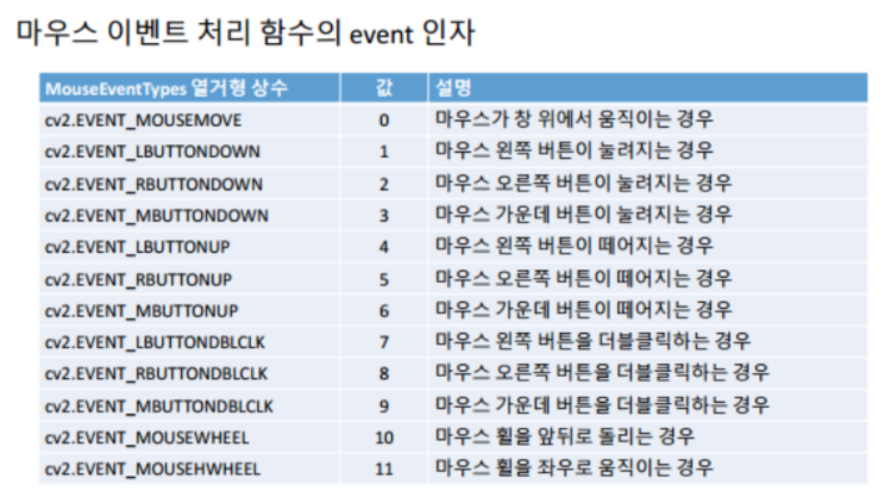


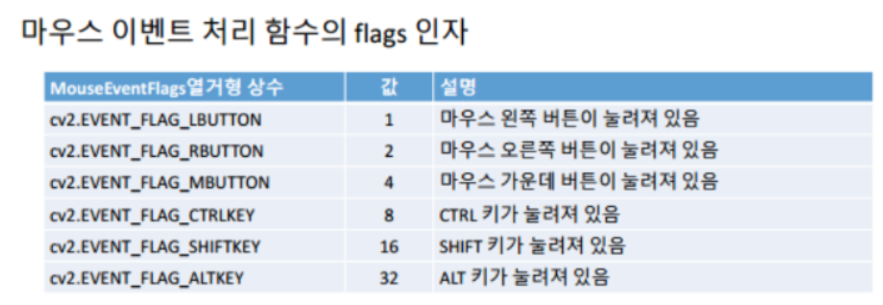

In [31]:
'''마우스 이벤트를 지원하는 setMouseCallback 함수를 적용
    하기 위해서는 사전에 사용자 정의 함수가 선언되어 있어야 함
'''
# 사각형의 시작점과 끝점을 지정하기 위해서는 x, y변수 외에 한 셋트가 
# 더 필요함
# 좌표값은 항상 양수이므로 사용하지 않는 음수값으로 초기화
x1, y1 = -1, -1

'''
    event : 마우스 이벤트의 종류
    x, y : 마우스 이벤트가 시행된 좌표
    flags: 마우스 이벤트 발생시의 상태
    img: 적용될 입력 이미지

'''
def rectangle(event, x, y, flags, img) :
    # global : 전역변수 설정
    global x1, y1
    if event == cv2.EVENT_LBUTTONDOWN : #좌상단 좌표
        x1, y1 = x, y  # 우리가 클릭한 좌표값 저장 ; 좌상단좌표
        print(f"사각형 좌상단 좌표: {x1}, {y1}")
    #마우스 좌클릭을 땠을 경우
    elif event == cv2.EVENT_LBUTTONUP : # 마우스가 떼졌을떼
        # x, y는 마우스 드래그가 끝나면서 좌측버튼이 떼질때의 사각형 우하단 좌표 
        cv2.rectangle(img, (x1, y1), (x, y), (0, 255, 0), 3)  #우하단좌표 
        print(f"사각형 우하단 좌표: {x}, {y}")
        

In [33]:
img = cv2.imread('image/image_cat.png')

#생성될 윈도우 창의 이름 설정
cv2.namedWindow('figure')

# setMouseCallback(윈도우창 이름, 사용자 정의 함수명, 입력 이미지)
cv2.setMouseCallback('figure', rectangle, img)

while True :
    cv2.imshow('figure', img)
    # 마우스 이벤트 실행 후 사각형이 그려진 프레임이 보이기 까지의 시간
    key = cv2.waitKey(1)
    if key == 27:
        cv2.destroyAllWindows()
        break

사각형 좌상단 좌표: 62, 20
사각형 우하단 좌표: 135, 91
사각형 좌상단 좌표: 62, 109
사각형 우하단 좌표: 143, 161


### 색상 추적 
- RGB 색상 : 색의 3요소만 가지고 색상을 판단 
    - 채도, 명도에 따라 변화가 심함 -> 어떤 색인지 명확하게 알기가 힘듦 
    - 채도 : 탁한 정도(수치가 낮으면 탁해짐)
    - 명도 : 밝기 정도 ( 수치가 클수록 밝아짐)
- HSV 색상 : 색상과 채도, 명도를 종합적으로 판단하는 색 체계
    - H(hue: 색상), S(saturation: 채도), V(value: 명도)
        - 색상은 각도 수치로 표시됨(0-360)빨강부터 무지개색 순서, 360이 되면 다시 빨강색! 
        - OpenCV에서는 색의 범위를 0~180으로 재한해서 사용하며 HSV 색상표에서 1/2값으로 줄여서 적용함
        -  명도도 0~100값으로 수치가 클수록 밝아짐
        - 채도는 0~100값으로 수치가 낮을수록 탁해짐 

In [ ]:
### HSV 색상표

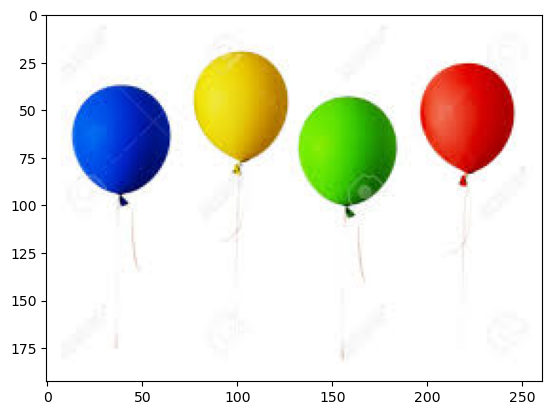

In [35]:
img = cv2.imread('image/balloon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img);

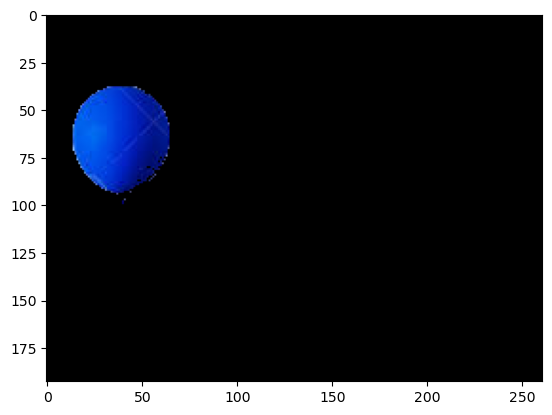

In [38]:
# 색상 체계를 RGB에서 HSV로 변환
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# 파란색 추적
# [색상, 채도, 명도]의 범위를 설정
min_range = np.array([100, 100, 100])
max_range = np.array([130, 255, 255])

# 원하는 색상이 포함된 마스크 이미지 얻어내기
img_mask = cv2.inRange(hsv, min_range, max_range)

#bitwise_and : 두개의 이미지에서 공통적인 부분은 bit연산의 and로 진행
'''
    실제 이미지와 마스크 이미지를 and연산하여 해당 이미지에도 있고, 
    마스크 이미지에도 있는 픽셀을 추출하는 개념
'''
img2 = cv2.bitwise_and(img, img, mask=img_mask)
plt.imshow(img2);